#### Time Series EDA

- Date Time Index
- Time Resampling
- Time Shift
- Mean Rolling And Expanding
- Time Series Visualiztion 
- One Sample Project On Time Series

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define the ticker symbol
ticker_symbol = 'TSLA'

# Fetch Tesla stock data
tsla_data = yf.Ticker(ticker_symbol)

# Extract historical market data (e.g., last 10 year)
historical_data = tsla_data.history(period="10y")

# Convert the Date index to a date-only format (remove time)
historical_data.index = historical_data.index.date

# Display the updated historical data
print(historical_data)

# Save the data to a CSV file
historical_data.to_csv("TSLA_historical_data_date_only.csv")


                  Open        High         Low       Close     Volume  \
2014-12-29   15.126667   15.194000   14.934667   15.047333   42037500   
2014-12-30   14.932667   15.043333   14.760000   14.815333   43548000   
2014-12-31   14.872667   15.045333   14.816667   14.827333   34462500   
2015-01-02   14.858000   14.883333   14.217333   14.620667   71466000   
2015-01-05   14.303333   14.433333   13.810667   14.006000   80527500   
...                ...         ...         ...         ...        ...   
2024-12-20  425.510010  447.079987  417.640015  421.059998  132216200   
2024-12-23  431.000000  434.510010  415.410004  430.600006   72698100   
2024-12-24  435.899994  462.779999  435.140015  462.279999   59551800   
2024-12-26  465.160004  465.329987  451.019989  454.130005   76366400   
2024-12-27  449.519989  450.000000  426.500000  431.660004   82330900   

            Dividends  Stock Splits  
2014-12-29        0.0           0.0  
2014-12-30        0.0           0.0  
2014-12-3

In [3]:
tesla = pd.read_csv('TSLA_historical_data_date_only.csv')
tesla.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-12-29,15.126667,15.194000,14.934667,15.047333,42037500,0.0,0.0
1,2014-12-30,14.932667,15.043333,14.760000,14.815333,43548000,0.0,0.0
2,2014-12-31,14.872667,15.045333,14.816667,14.827333,34462500,0.0,0.0
3,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0
4,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0


In [4]:
# Renaming columns
tesla.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

print(tesla)

            Date        Open        High         Low       Close     Volume  \
0     2014-12-29   15.126667   15.194000   14.934667   15.047333   42037500   
1     2014-12-30   14.932667   15.043333   14.760000   14.815333   43548000   
2     2014-12-31   14.872667   15.045333   14.816667   14.827333   34462500   
3     2015-01-02   14.858000   14.883333   14.217333   14.620667   71466000   
4     2015-01-05   14.303333   14.433333   13.810667   14.006000   80527500   
...          ...         ...         ...         ...         ...        ...   
2512  2024-12-20  425.510010  447.079987  417.640015  421.059998  132216200   
2513  2024-12-23  431.000000  434.510010  415.410004  430.600006   72698100   
2514  2024-12-24  435.899994  462.779999  435.140015  462.279999   59551800   
2515  2024-12-26  465.160004  465.329987  451.019989  454.130005   76366400   
2516  2024-12-27  449.519989  450.000000  426.500000  431.660004   82330900   

      Dividends  Stock Splits  
0           0.0    

In [5]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [6]:
tesla.set_index('Date', inplace=True)

In [7]:
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-29,15.126667,15.194000,14.934667,15.047333,42037500,0.0,0.0
2014-12-30,14.932667,15.043333,14.760000,14.815333,43548000,0.0,0.0
2014-12-31,14.872667,15.045333,14.816667,14.827333,34462500,0.0,0.0
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0


In [8]:
tesla.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-20,425.510010,447.079987,417.640015,421.059998,132216200,0.0,0.0
2024-12-23,431.000000,434.510010,415.410004,430.600006,72698100,0.0,0.0
2024-12-24,435.899994,462.779999,435.140015,462.279999,59551800,0.0,0.0
2024-12-26,465.160004,465.329987,451.019989,454.130005,76366400,0.0,0.0
2024-12-27,449.519989,450.000000,426.500000,431.660004,82330900,0.0,0.0


<Axes: xlabel='Date'>

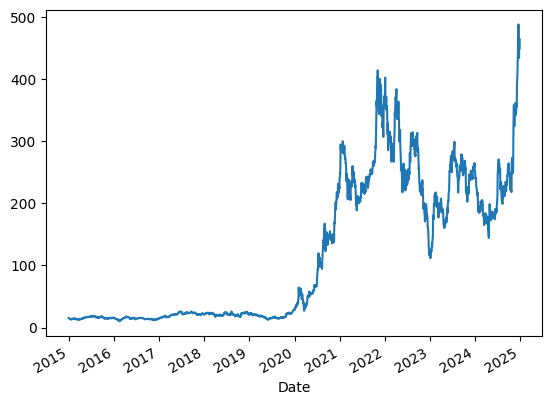

In [9]:
tesla['High'].plot()

<Axes: xlabel='Date'>

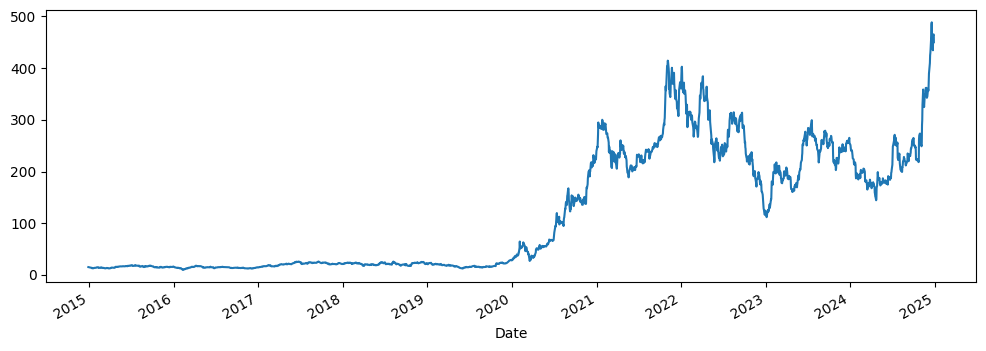

In [10]:
tesla['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

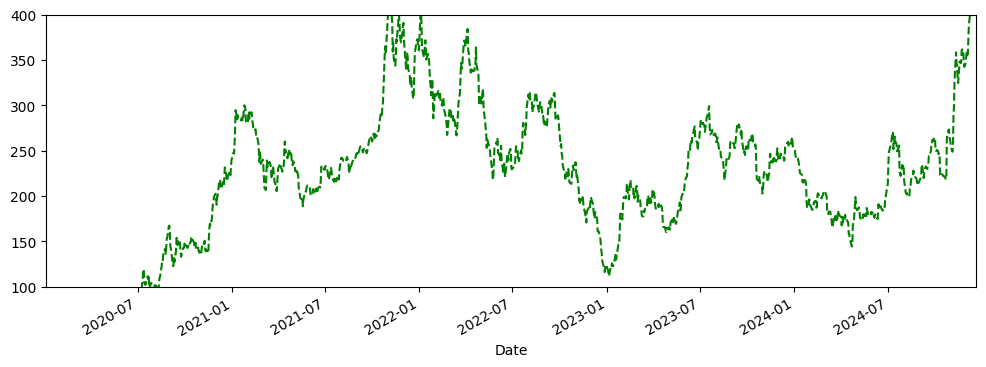

In [11]:
# xlim and ylim and coloring
tesla['High'].plot(figsize=(12,4),
                   xlim=['2020-01-05','2024-12-20'],
                   ylim=[100,400],
                   c='green', ls= '--')

In [12]:
tesla.index

DatetimeIndex(['2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12',
               ...
               '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24',
               '2024-12-26', '2024-12-27'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [13]:
index = tesla.loc['2020-12-27':'2024-12-27'].index

In [14]:
index

DatetimeIndex(['2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11',
               ...
               '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24',
               '2024-12-26', '2024-12-27'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [15]:
open = tesla.loc['2020-12-27':'2024-12-27']['Open']

In [16]:
open

Date
2020-12-28    224.836670
2020-12-29    220.333328
2020-12-30    224.000000
2020-12-31    233.330002
2021-01-04    239.820007
                 ...    
2024-12-20    425.510010
2024-12-23    431.000000
2024-12-24    435.899994
2024-12-26    465.160004
2024-12-27    449.519989
Name: Open, Length: 1007, dtype: float64

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

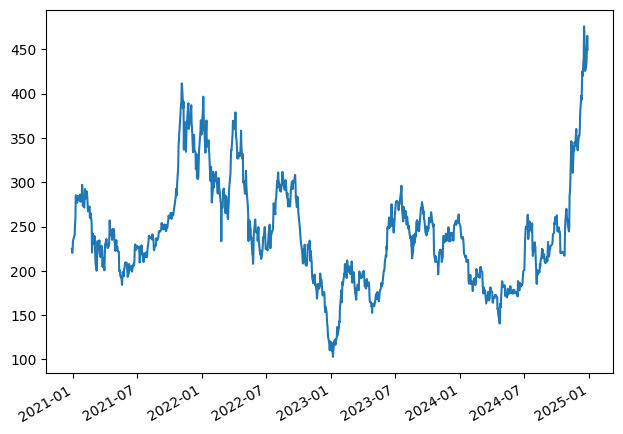

In [18]:
fig , ax = plt.subplots()

plt.tight_layout()

# prevent the overlaping
fig.autofmt_xdate()

ax.plot(index,open)

In [19]:
datetime(2024,12,29)

datetime.datetime(2024, 12, 29, 0, 0)

In [20]:
datetime.now()

datetime.datetime(2024, 12, 29, 21, 3, 31, 552588)

In [21]:
def add_num(num1,num2):
    return num1+num2

In [22]:
start_time = datetime.now()

num1 = 1
num2 = 2

add_num(num1,num2)

end_time = datetime.now()

print(end_time - start_time)

0:00:00


In [23]:
date = datetime(2024,12,29)

In [24]:
date

datetime.datetime(2024, 12, 29, 0, 0)

In [25]:
date.date()

datetime.date(2024, 12, 29)

In [26]:
date.day

29

In [27]:
date.weekday()

6

In [28]:
date.year

2024

In [29]:
date.month

12

##### Time Resampling

In [30]:
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-29,15.126667,15.194000,14.934667,15.047333,42037500,0.0,0.0
2014-12-30,14.932667,15.043333,14.760000,14.815333,43548000,0.0,0.0
2014-12-31,14.872667,15.045333,14.816667,14.827333,34462500,0.0,0.0
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0


<Axes: xlabel='Date'>

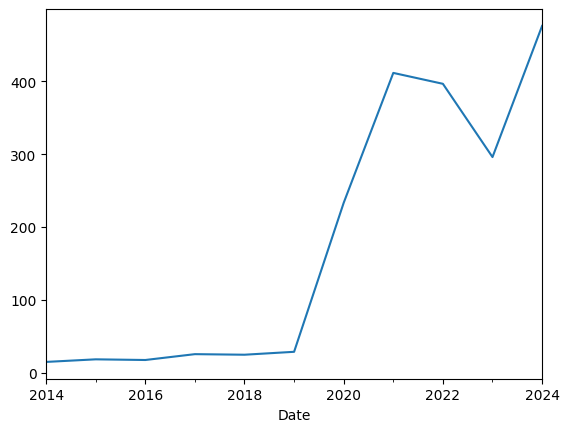

In [31]:
# A - Year and Frequency 
tesla.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

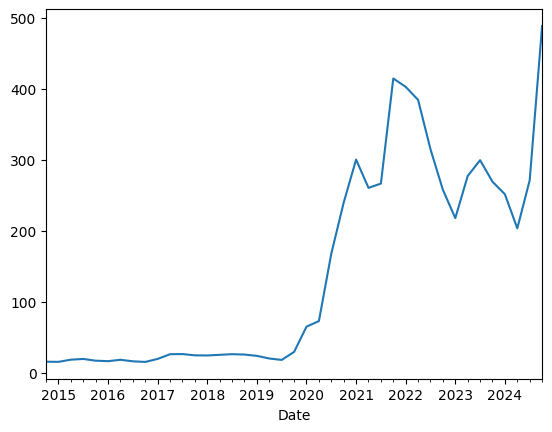

In [32]:
# QS - Quarterly start Frequency 
tesla.resample(rule='QS').max()['High'].plot()

<Axes: xlabel='Date'>

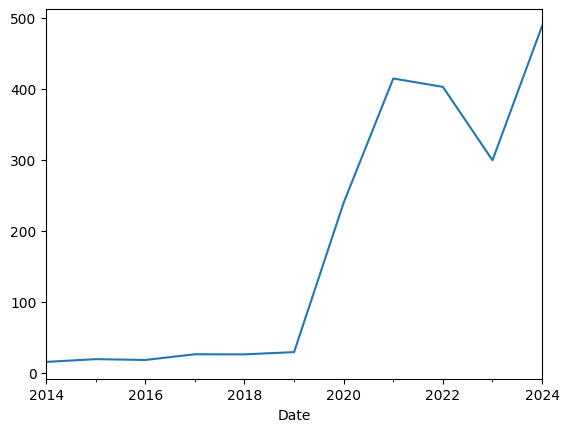

In [33]:
# BA - Bussiness End Frequency 
tesla.resample(rule='BA').max()['High'].plot()

<Axes: xlabel='Date'>

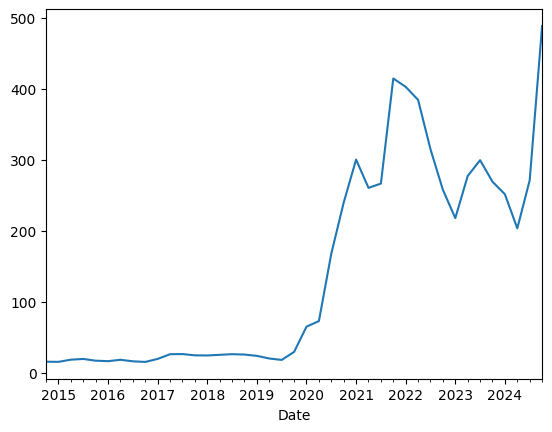

In [34]:
# BQS - Bussiness Quarters Frequency 
tesla.resample(rule='BQS').max()['High'].plot()

<Axes: xlabel='Date'>

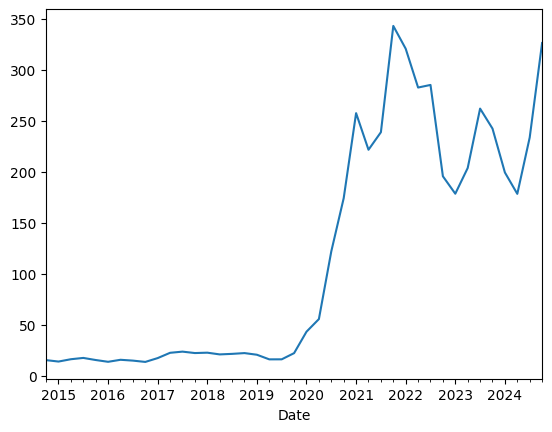

In [35]:
tesla['High'].resample(rule='BQS').mean().plot()

<Axes: xlabel='Date'>

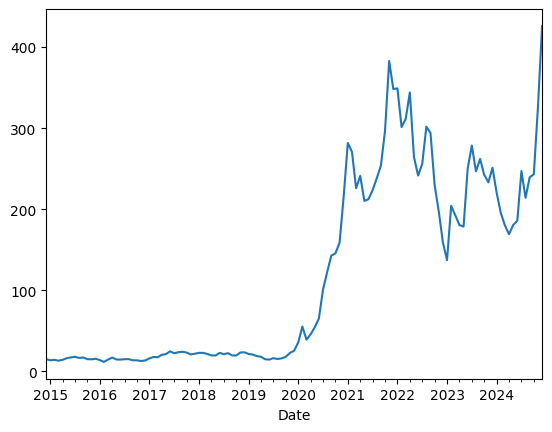

In [36]:
# M - mean
tesla['High'].resample(rule='M').mean().plot()

In [39]:
tesla['High'].rolling(10).mean()

Date
2014-12-29           NaN
2014-12-30           NaN
2014-12-31           NaN
2015-01-02           NaN
2015-01-05           NaN
                 ...    
2024-12-20    444.416995
2024-12-23    447.387997
2024-12-24    452.692996
2024-12-26    456.737994
2024-12-27    458.807996
Name: High, Length: 2517, dtype: float64

In [40]:
 tesla['Open:30 days rolling'] = tesla['Open'].rolling(30).mean()

In [41]:
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open:30 days rolling
Date,,,,,,,,
2014-12-29,15.126667,15.194000,14.934667,15.047333,42037500,0.0,0.0,NaN
2014-12-30,14.932667,15.043333,14.760000,14.815333,43548000,0.0,0.0,NaN
2014-12-31,14.872667,15.045333,14.816667,14.827333,34462500,0.0,0.0,NaN
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0,NaN
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0,NaN


<Axes: xlabel='Date'>

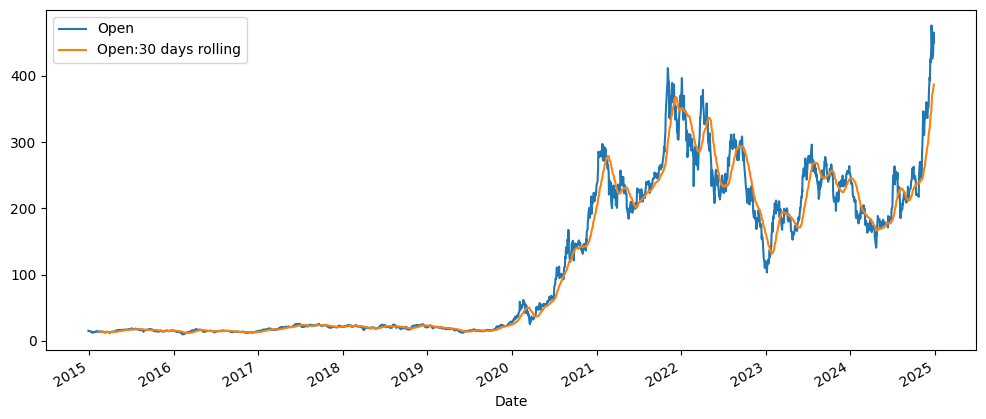

In [42]:
tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))